# 의사결정나무

In [1]:
from math import log

def calcShannonEnt(dataSet):
    numEntries = len(dataSet)
    # 1. 분류 항목에 대한 딕셔너리 생성
    labelCounts = {}
    for featVec in dataSet:
        currentLabel = featVec[-1]
        if currentLabel not in labelCounts.keys():
            labelCounts[currentLabel] = 0
            labelCounts[currentLabel] +=1
    ####
    
    shannonEnt = 0.0
    for key in labelCounts:
        prob = float(labelCounts[key]) / numEntries
        # 2. 밑수가 2인 로그
        shannonEnt -= prob * log(prob,2) 
    return shannonEnt

# DataSet 생성
def createDataSet():
    dataSet = [[1,1,'yes'],[1,1,'yes'],[1,0,'no'],[0,1,'no'], [0,1,'no']]
    labels = ['no surfacing', 'flippers']
    return dataSet, labels

In [2]:
myDat, labels = createDataSet()
myDat

[[1, 1, 'yes'], [1, 1, 'yes'], [1, 0, 'no'], [0, 1, 'no'], [0, 1, 'no']]

######  엔트로피가 높다 = 데이터가 복잡하다를 의미

In [4]:
calcShannonEnt(myDat)

0.9287712379549449

In [6]:
myDat[0][-1] = 'maybe'
myDat

[[1, 1, 'maybe'], [1, 1, 'yes'], [1, 0, 'no'], [0, 1, 'no'], [0, 1, 'no']]

###### 복잡해진 만큼 엔트로피가 증가

In [7]:
calcShannonEnt(myDat)

1.3931568569324173

### 데이터 집합 분할 : 엔트로피를 측정하고 데이터 집합을 분할한다

In [8]:
def splitDataSet(dataSet, axis, value):
    retDataSet = [] # 1. 분할 리스트 생성
    for featVec in dataSet:
        # 2. 분할한 속성 잘라내기(엔트로피 지수를 활용ㅠ)
        if featVec[axis] == value: 
            reducedFeatVec = featVec[:axis]
            reducedFeatVec.extend(featVec[axis+1:])
            retDataSet.append(reducedFeatVec)
        #### 
    return retDataSet

In [19]:
myDat, labels = createDataSet()
splitDataSet(myDat,0,1)

[[1, 'yes'], [1, 'yes'], [0, 'no']]

In [12]:
splitDataSet(myDat,0,0)

[[1, 'no'], [1, 'no']]

###  데이터 분할 시 가장 좋은 속성 선택하기

In [16]:
def chooseBestFeatureToSplit(dataSet):
    numFeatures = len(dataSet[0]) - 1
    baseEntropy = calcShannonEnt(dataSet)
    bestInfoGain = 0.0; bestFeature = -1
    for i in range(numFeatures):
        # 1. 분류 항목 표시에 대한 중복 없는 리스트 생성
        featList = [example[i] for example in dataSet] 
        uniqueVals = set(featList)
        newEntropy = 0.0
        for value in uniqueVals:
            # 2. 분할을 위한 엔트로피 계산
            subDataSet = splitDataSet(dataSet,i,value)
            prob = len(subDataSet)/float(len(dataSet))
            newEntropy += prob * calcShannonEnt(subDataSet)
            ####
        infoGain = baseEntropy - newEntropy
        if (infoGain > bestInfoGain):
            bestInfoGain = infoGain
            bestFeature = i
    return bestFeature # 3. 가장 큰 이득 정보 리턴

In [22]:
chooseBestFeatureToSplit(myDat)

1

In [21]:
myDat

[[1, 1, 'yes'], [1, 1, 'yes'], [1, 0, 'no'], [0, 1, 'no'], [0, 1, 'no']]

# 재귀적 트리 만들기

In [25]:
import operator

###### 다수결 함수 : 속성의 개수를 다 사용했는지 확인

In [24]:
def majorityCnt(classList):
    classCount = {}
    for vote in classList:
        if vote not in classCount.keys(): classCount[vote] = 0
        classCount[vote] += 1
        sortedClassCount = sorted(classCount.iteritems(), key = operator.itemgetter(1), reverse = True)
    return sortedClassCount[0][0]

### 트리 생성 코드

In [26]:
def createTree(dataSet, labels):
    classList = [example[-1] for example in dataSet]
    
    if classList.count(classList[0]) == len(classList): # 분류 항목이 같을 때 멈춤
        return classList[0]
    if len(dataSet[0]) == 1: # 속성이 더이상 없을 경우 단말노드를 불러옴
        return majorityCnt(classList)
    
    bestFeat = chooseBestFeatureToSplit(dataSet)
    bestFeatLabel = labels[bestFeat]
    
    myTree = {bestFeatLabel:{}}
    del(labels[bestFeat])
    
    featValues = [example[bestFeat] for example in dataSet]
    uniqueVals = set(featValues)
    for value in uniqueVals:
        subLabels = labels[:]
        myTree[bestFeatLabel][value] = createTree(splitDataSet(dataSet, bestFeat, value), subLabels)
    
    return myTree

In [27]:
myTree = createTree(myDat, labels)

In [28]:
myTree

{'flippers': {0: 'no', 1: {'no surfacing': {0: 'no', 1: 'yes'}}}}

# 의사결정나무 시각화

In [31]:
import matplotlib.pyplot as plt
%matplotlib inline

decisionNode = dict(boxstyle="sawtooth", fc = "0.8")
leafNode = dict(boxstyle="round4", fc="0.8")
arrow_args = dict(arrowstyle="<-")

def plotNode(nodeTxt, centerPt, parentPt, nodeType):
    createPlot.ax1.annotate(nodeTxt, 
                            xy=parentPt, 
                            xycoords = 'axes fraction', 
                            xytext = centerPt, 
                            textcoords = 'axes fraction', 
                            va="center", 
                            ha="center", 
                            bbox=nodeType, 
                            arrowprops = arrow_args)

def createPlot():
    fig = plt.figure(1, facecolor="white")
    fig.clf()
    createPlot.ax1 = plt.subplot(111, frameon =  False)
    plotNode('a decision node', (0.5, 0.1), (0.1, 0.5), decisionNode)
    plotNode('a leaf node' , (0.8, 0.1), (0.3, 0.8), leafNode)
    plt.show()

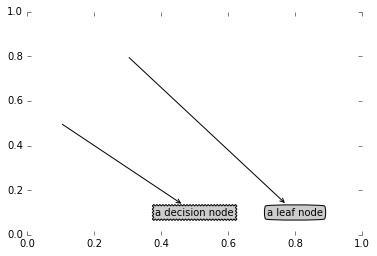

In [32]:
createPlot()

# 주석트리 구축하기

In [33]:
def getNumLeafs(myTree):
    numLeafs = 0
    firstStr = myTree.keys()[0]
    secondDict = myTree[firstStr]
    for key in secondDict.keys():
        if type(secondDict[key]).__name__ == 'dict':
            numLeafs += getNumLeafs(secondDict[key])
        else: numLeafs +=1
    return numLeafs

def getTreeDepth(myTree):
    maxDepth = 0
    firstStr = myTree.keys()[0]
    secondDict = myTree[firstStr]
    for key in secondDict.keys():
        if type(secondDict[key]).__name__ =='dict':
            thisDepth = 1 + getTreeDepth(secondDict[key])
        else : thisDepth = 1
        if thisDepth > maxDepth: maxDepth = thisDepth
    return maxDepth

def retrieveTree(i):
    listOfTrees = [{'no surfacing': {0:'no', 1: {'flippers': {0: 'no', 1: 'yes'}}}},
                   {'no surfacing': {0:'no', 1: {'flippers': {0: {'head': {0:'no', 1:'yes'}}, 1:'no'}}}}
                  ]
    
    return listOfTrees[i]

In [34]:
retrieveTree(1)

{'no surfacing': {0: 'no',
  1: {'flippers': {0: {'head': {0: 'no', 1: 'yes'}}, 1: 'no'}}}}

In [35]:
myTree = retrieveTree(0)

In [36]:
getNumLeafs(myTree)

3

In [37]:
getTreeDepth(myTree)

2

In [38]:
def plotMidText(cntrPt, parentPt, txtString):
    xMid = (parentPt[0] - cntrPt[0])/2.0 + cntrPt[0]
    yMid = (parentPt[1] - cntrPt[1])/2.0 + cntrPt[1]
    createPlot.ax1.text(xMid, yMid, txtString)

def plotTree(myTree, parentPt, nodeTxt):#if the first key tells you what feat was split on
    numLeafs = getNumLeafs(myTree)  #this determines the x width of this tree
    depth = getTreeDepth(myTree)
    firstStr = myTree.keys()[0]     #the text label for this node should be this
    cntrPt = (plotTree.xOff + (1.0 + float(numLeafs))/2.0/plotTree.totalW, plotTree.yOff)
    plotMidText(cntrPt, parentPt, nodeTxt)
    plotNode(firstStr, cntrPt, parentPt, decisionNode)
    secondDict = myTree[firstStr]
    plotTree.yOff = plotTree.yOff - 1.0/plotTree.totalD
    for key in secondDict.keys():
        if type(secondDict[key]).__name__=='dict':#test to see if the nodes are dictonaires, if not they are leaf nodes   
            plotTree(secondDict[key],cntrPt,str(key))        #recursion
        else:   #it's a leaf node print the leaf node
            plotTree.xOff = plotTree.xOff + 1.0/plotTree.totalW
            plotNode(secondDict[key], (plotTree.xOff, plotTree.yOff), cntrPt, leafNode)
            plotMidText((plotTree.xOff, plotTree.yOff), cntrPt, str(key))
    plotTree.yOff = plotTree.yOff + 1.0/plotTree.totalD
#if you do get a dictonary you know it's a tree, and the first element will be another dict

def createPlot(inTree):
    fig = plt.figure(1, facecolor='white')
    fig.clf()
    axprops = dict(xticks=[], yticks=[])
    createPlot.ax1 = plt.subplot(111, frameon=False, **axprops)    #no ticks
    #createPlot.ax1 = plt.subplot(111, frameon=False) #ticks for demo puropses 
    plotTree.totalW = float(getNumLeafs(inTree))
    plotTree.totalD = float(getTreeDepth(inTree))
    plotTree.xOff = -0.5/plotTree.totalW; plotTree.yOff = 1.0;
    plotTree(inTree, (0.5,1.0), '')
    plt.show()

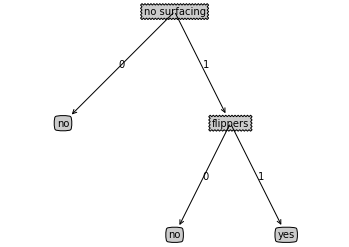

In [39]:
myTree = retrieveTree(0)
createPlot(myTree)

# 분류를 위한 트리 사용

In [40]:
def classify(inputTree, featLabels, testVec):
    firstStr = inputTree.keys()[0]
    secondDict = inputTree[firstStr]
    featIndex = featLabels.index(firstStr)
    for key in secondDict.keys():
        if testVec[featIndex] == key:
            if type(secondDict[key]).__name__ == 'dict':
                classLabel = classify(secondDict[key], featLabels, testVec)
            else : classLabel = secondDict[key]
    return classLabel

In [41]:
myDat, labels = createDataSet()

In [42]:
labels

['no surfacing', 'flippers']

In [43]:
myTree = retrieveTree(0)
myTree

{'no surfacing': {0: 'no', 1: {'flippers': {0: 'no', 1: 'yes'}}}}

In [44]:
classify(myTree, labels, [1,0])

'no'

In [45]:
classify(myTree, labels, [1,1])

'yes'

# 의사결정 트리 유지

In [46]:
def storeTree(inputTree, filename):
    import pickle
    fw = open(filename, 'w')
    pickle.dump(inputTree, fw)
    fw.close()

def grabTree(filename):
    import pickle
    fr = open(filename)
    return pickle.load(fr)

In [47]:
storeTree(myTree, 'classifireStorage.txt')

In [49]:
grabTree('classifireStorage.txt')

{'no surfacing': {0: 'no', 1: {'flippers': {0: 'no', 1: 'yes'}}}}

# 예제 : 콘택트렌즈 유형 예측

In [50]:
fr = open('lenses.txt')
lenses = [inst.strip().split('\t') for inst in fr.readlines()]
lensesLabels = ['age', 'prescript', 'astigmatic', 'tearRate']
lensesTree = createTree(lenses, lensesLabels)
lensesTree

{'tearRate': {'hard': 'hard', 'no lenses': 'no lenses', 'soft': 'soft'}}

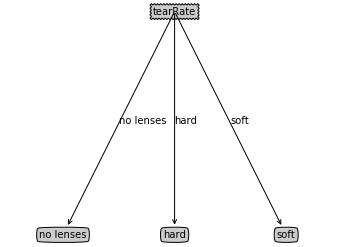

In [51]:
createPlot(lensesTree)